[![Screenshot-2023-04-11-at-22-10-56.png](https://i.postimg.cc/BvDypgTT/Screenshot-2023-04-11-at-22-10-56.png)](https://postimg.cc/PLX2r1FJ)

**Цель этого исследования** - проанализировать клиентские анкеты текущих клиентов фитнес-центра "Культурист-Датасаентист" и подготовить план действий по удержанию клиентов

**Ход исследования**
В качестве вводных данных от отдела по работе с клиентами «Культуриста-датасаентиста» мной получен датасет, содержащий отцифрованные клиентские анкеты с множеством различных параметров. Данные получены из доверенных источников, тем не менее стоит оценить их качество перед началом исследования и пройти все этапы работы от изучения и предобработки до финального анализа.


# НАВИГАЦИЯ 
 1. [Исследовательский анализ данных](#data_review) 
 2. [Модель прогнозирования оттока клиентов](#model_1)      
 5. [Кластеризация клиентов](#model_2)
 6. [Выводы и рекомендации по стратегии удержания клиентов](#results)

Импортирую библиотеки, необходимые для работы над проектом:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#### ЗАГРУЖАЮ ДАТАСЕТ С ДАННЫМИ О КЛИЕНТАХ ФИТНЕС-ЦЕНТРА ПО РАЗЛИЧНЫМ ПАРАМЕТРАМ

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

<a id="data_review"></a>
## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)

In [4]:
display(data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.shape

(4000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

**В датасете 4К записей и 14 столбцов с различными параметрами.** 

Метод **.info( )** показывает, что:
- **пропусков в данных нет** - во всех столбцах одинаковое количество данных
- **формат данных везде числовой и совпадает по смыслу с значениями параметров** - здесь доп обработки не требуется

Метод **.describe( )** дает возможность сказать, что:
1. **очевидных аномальных значений в данных нет** 

    - Так, в полях, где должны быть бинарные значения есть только 0 или 1 (например, возраст, наличие телефона, нахождение в локации рядом с фитнесом, наличие партнера, использование промо-кода друга, посещение групповых занятий, параметр оттока) 
    - Возраст также находится в нормальных границах от 18 до 41 года
    - В полях с дискретными значениями (длительность текущего действующего абонемента, срок до окончания текущего действующего абонемента) никаких аномалий не замечено  

2. **показатели среднего значения и стандартного отклонения дают интересные данные для дальнейшего анализа**:

    - **в большинстве параметров разброс данных совсем небольшой**. Это логично, ведь в данных много параметров с двумя возможными значениями 0 и 1.
    - **единственный параметр, вызывающий "вопросы", - 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон).** При минимальном значении = 0,15 и максимальном = 552,6, среднее значение 147 и стандартное отклонение 96,3. Таким образом, стандартное отклонение получается достаточно большим, что говорит о том, что данные в этом наборе очень разнообразны. Это может сигнализировать о наличии выбросов в данных и требует отдельного изучения. 
   - **средние значения дают интересное представление о данных в бинарных колонках**. Предварительно можно говорить, что:
        - *Гендерное соотношение клиентов* спортивного клуба примерно 50% на 50%
        - *Большинство из них живет в районе*, где находится фитнес-центр - 84,5%
        - *Почти половина из них пришла от работодателя* (48,6%) и только 30,8% по рекомендации друга
        - Чуть больше *40% посещают групповые занятия*
        - *Около 26% клиентов "оттекли"* в текущем месяце 
   - **средний возраст клиентов чуть больше 29 лет**, причем квартили и стандартное отклонение дают повод предположить, что распределение немного смещено в сторону более молодых. 75% клиентов моложе 31 года. Нужно будет отдельно посмотреть на это распределение.
   - **Столбцы с данными по средней частоте посещений в неделю с начала действия абонемента и за последний месяц требуют дополнительного анализа.** Стандартное отклонение заметное, но не критичное.

Разделю группы по признаку оттока и рассмотрю отдельно средние показатели для тех, кто продолжает заниматься и бросат

In [8]:
data.groupby(by=['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

На сравнение средних значения для двух групп "оставшихся" и "ушедших" можно сделать интересные предварительные наблюдения. Можно предположить, что:
>- **гендер** не показателен с точки зрения оттока - уходят/остаются и женщины и мужчины
>- **локация** имеет большее значение: чеща остаются те, кто живет на районе, в котором находится клую
>- **показатели покупки членства от работодателя и по промо-коду друга** имеют значительный вес: те, кто пользуется скидкой от работы или пришли по реко друга остаются значительное чаще
>- **среднее показателей длительности текущего абонимента и месяцев до окончания текущего действующего абонемента** позволяют сказать, что пользователи, заключившие более длительный контракт меньше уходят в отток
>- те, кто посещает **групповые занятия**, также реже уходят в отток
>- с точки зрения **возраста** отваливаются более молодые пользователи - средний возраст 26,9 против почти 30 (возможно у первых еще не начала болеть спина каждое утро :) )
>- те, кто тратят больше на **дополнительные услуги (кафе, спорттовары, косметический и массажный салон)** больше сколнны оставаться (и тут также разница хорошо заметна)
>- показатель **среднего времени с момента первого обращения в фитнес-центр** говорит о том, что скорее всего самым "опасным" временем является начало посещения спорт-клуба - в это время пользовтели чаще "отваливаются" (и здесь разница особенно хорошо видна) 
>- данные по **среднему средней частоты посещений в неделю с начала действия абонемента и за последний месяц** позволяют предположить, что те, кто осаются ходят немного чаще, но значительной разницы не наблюдается

Для более грубокого анализа построю гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

***NB!** чтобы просмотреть все параметры без скролла использую горячие клавиши Shift + O*

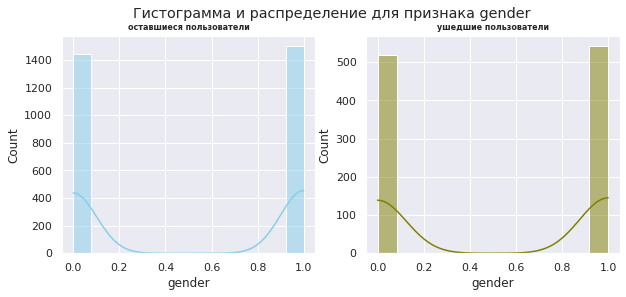

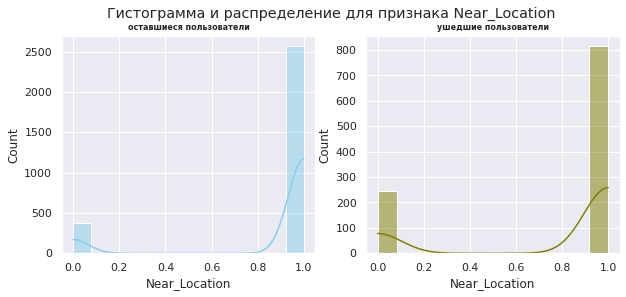

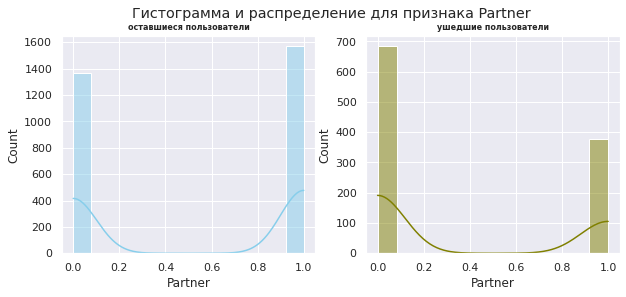

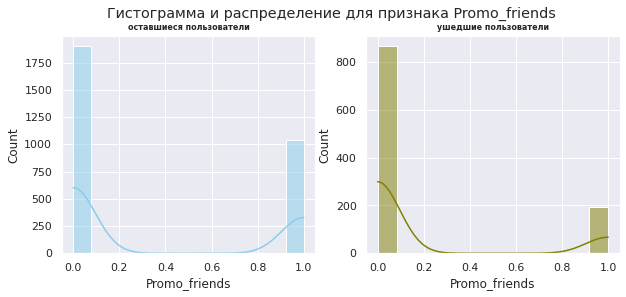

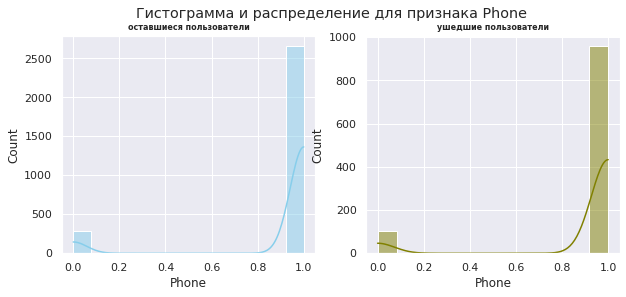

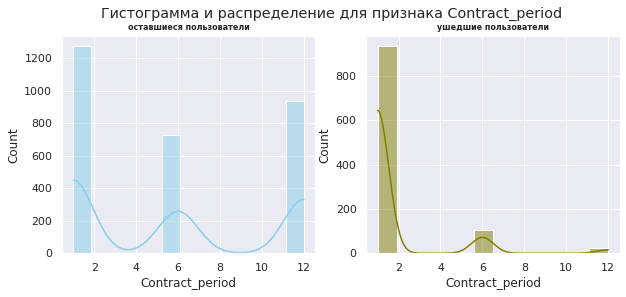

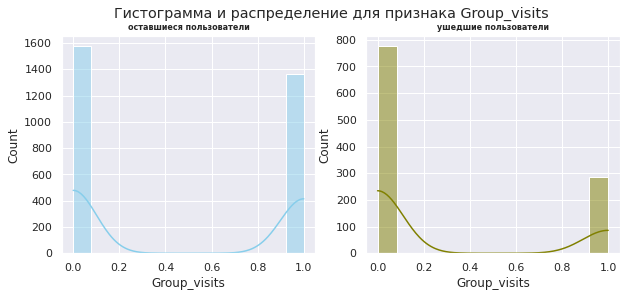

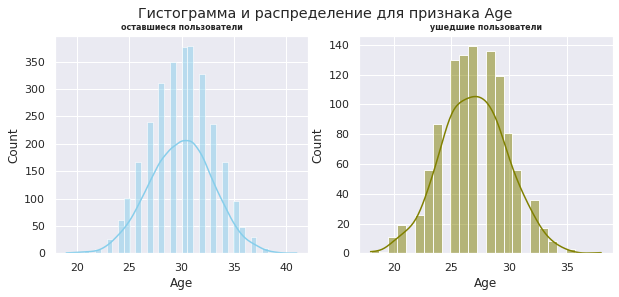

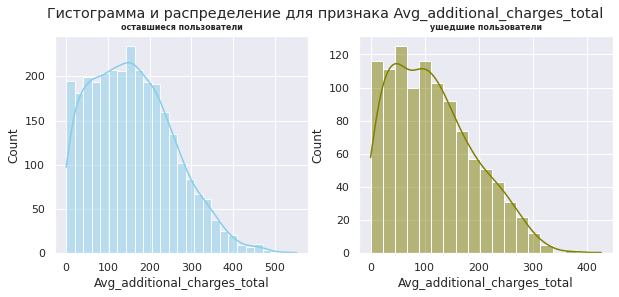

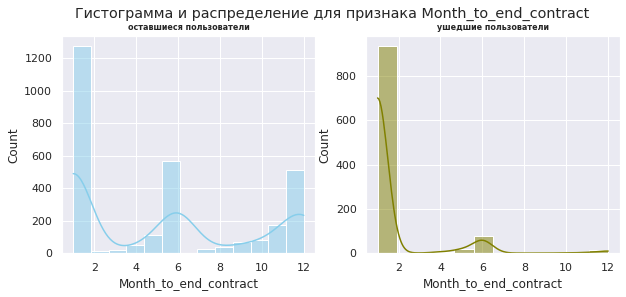

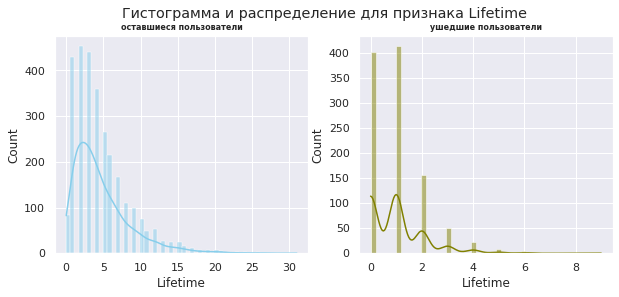

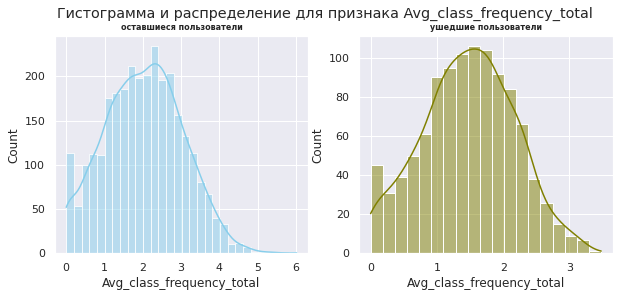

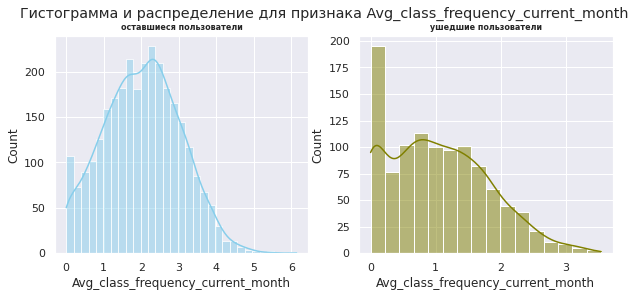

In [9]:
for feature in data.columns:
    if feature != 'Churn':
        sns.set(style="darkgrid")
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        sns.histplot(data=data.query('Churn == 0'), x=feature, kde=True, color="skyblue", ax=axs[0])
        axs[0].set_title('оставшиеся пользователи', fontsize=8, weight='bold', ha='center')
        sns.histplot(data=data.query('Churn == 1'), x=feature, kde=True, color="olive", ax=axs[1])
        axs[1].set_title('ушедшие пользователи', fontsize=8, weight='bold', ha='center')
        fig.suptitle(f'Гистограмма и распределение для признака {feature}')
        plt.show()

#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

В данных есть три вида параметров: бинарные, дискретные и непрерывные.
- **бинарные данные (возраст, локация, промо-коды от работодателя или друга, посещение групповых занятий** показывают ожидаемую картину распределения между двумя возможными вариантами 0 и 1. Графики подтверждают выводы, которые были сделаны в предыдущем пункте.
- **дискретные (длительность текущего действующего абонемента, срок до окончания текущего действующего абонемента)** также показывают ожидаемую картину с "волнистым" распределением у вариантов возможных значений. Графики также подтверждают выводы предыдущего пункта
- самые интересные - непрерывные параметры. остановлюсь на них подробнее:
  >- **показатель возраста** ожидаемо выглядит как нормальное распределение. здесь на графиках хорошо заметно смещение "оттекших" пользователей к более молодому возрасту (максимальный возраст 35 и пик кривой визульно чуть смещен влево)
  >- графики по **средней частоты посещений в неделю с начала действия абонемента и за последний месяц** стремятся к нормальному распределению (особенно у оставшихся пользователей). При этом на графиках отлично видно, что частота походов "оттекших" пользователей незначительно ниже, чем у оставшихся (примерно 1,5 против 2,5). Но "оттекшие" редхо ходят заниматься больше 3 раз в месяц, когда оставшиеся могут ходить 5+ раз. И годовая перспектива, и перспектива одного месяца показывает примерно одинаковую картину. Также отдельно хочу отметить, что у новичков стремление ходить в фитнесс-глуб самое высокое. На графиках обоих групп виден пик в районе нуля.
  >- график **среднего времени с момента первого обращения в фитнес-центр** значительно отличается для двух групп. Если для "оставшихся" он стремится к нормальному распределению, то у "оттекших" выглядит как волнистая кривая с несколькими пиками и нисходящим трендом. Это можно объяснить тем, что для "оттекших" среднее время совсем невысокое: мало кто из них посещает клуб дольше 4-5 месяцев. Когда у оставшихся длительность доходит до 15-20.
  >- график самого "сомнительного" показателя - **дополнительных услуг** - показал, что в данных нет выбрасов и для обоих групп распределение стремится к нормальному. Также можно с уверенностью говорить о том, что те, кто "оттекает" тратит на допольнительные услуги меньше денег (а значит, возможно, не готовы серьезно заниматься спортом: не покупают спорт. продукты, не ходят на дополнительный массаж после тренировок, чтобы разминать мышцы и тд)

Для того, чтобы оценить какие из параметров показывают наибольшую корреляцию на целевой показатель оттока, построю матрицу корреляций и визуализирую ее методом .heatmap

In [10]:
correlations = data.corr()
display(correlations)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<AxesSubplot:>

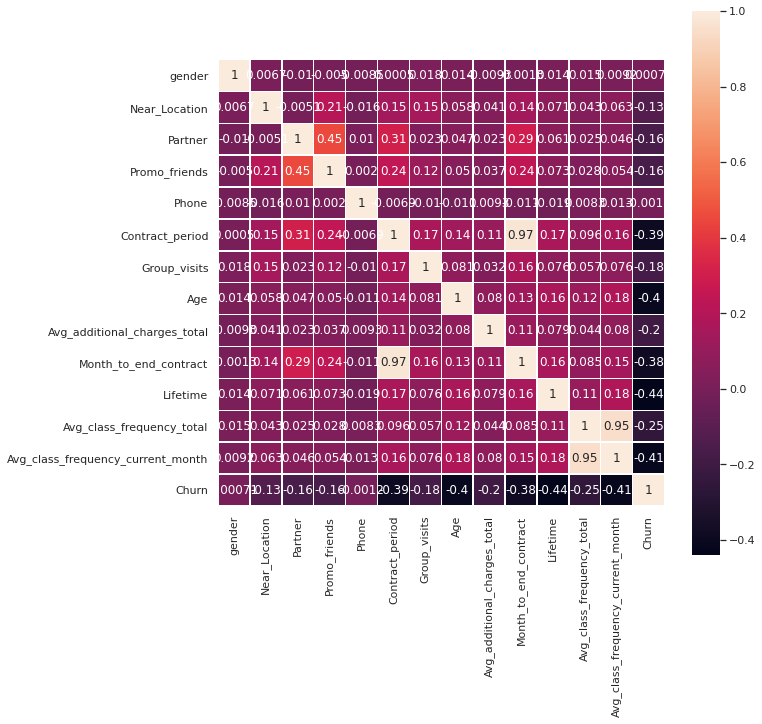

In [11]:
#NB!чтобы просмотреть все параметры без скролла использую горячие клавиши Shift + O*
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True, square=True, linewidths=.5, ax=ax)

В целом все параметры оказывают значительное влияние на целевой показатель. Для того, чтобы составить представление о том, как оценивать значения корреляции опишу столбец correlations['Churn'] методом .describe( ). Все значения в столбце отрицательные, так как корреляция обратная. Для удобства интерпретации возьму показатели в столбце по модулю

In [12]:
correlations['Churn'].abs().describe() 

count    14.000000
mean      0.292901
std       0.251552
min       0.000708
25%       0.159048
50%       0.224206
75%       0.401047
max       1.000000
Name: Churn, dtype: float64

#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

**Наибольшую корреляцию** с целевым показателе имеют признаки, входящие "верхнюю" четверть, то есть 0.40+. Это показатели (по убыванию):
>- среднего времени с момента первого обращения в фитнес-центр - 0.44
>- средней частота посещений в неделю за последний месяц - 0.41
>- возраста - 0.40

**Почти такую же сильную корреляцию** показывают ТОР 2 из "средней" четверти, то есть от 0.22 до 0.40 (по убыванию):
>- длительность текущего действующего абонемента - 0.39
>- срок до окончания текущего действующего абонемента - 0.38

Далее **со значительным отрывом от предыдущих идут еще 2 показателя** - последний из второй четверти и самый верхний из "нижней" четверти (по убыванию):
>- средняя частота посещений в неделю за все время с начала действия абонемента - 0.25
>- выручка от дополнительных услуг фитнес-центра - 0.2

Остльные признаки показывают **сравнительно невысокую корреляцию с целевым показателем** (по убыванию):
>- групповые занятия - 0.18
>- промо-коды друзей - 0.17
>- скидка от работодателя - 0.16
>- проживание недалеко от фитнес-центра - 0.13
>- наличие телефонного номера - 0.0012
>- гендер - 0.0007

**Также необходимо рассмотреть какие признаки сильно коррелируют между собой (для линейных моделей взаимная корреляция нежелательна).**

Самой яркой является корреляция между пользователями, которые приходят по скидке от работодателя, и пользователями, использующими промо-код друга - 0.45
>Здесь можно предположить, что те, кто приходят по скидке от работодателя приводят в клуб своих друзей по персональным промо-кодам 

Второй по силе является корреляция между пользователями, которые приходят по скидке от работодателя, и длиной контракта - 0.31
> здесь все максимально логично - скидка позводяет купить абонемент на более длинный срок, а на пике мотивации (в начале занятий спортом) кажется, что долгий срок вполне по плечу

Наличие промокода от друга работает в разрезе длительности контракта также, как скидка от работодателя - заметная корреляция на уровне 0.24
> и с другом ходить всегда приятнее и больше мотивации :)


**Все остальные сравнительно заметные показатели корреляции между признаками относятся к столбцу, содержащему возраст**. Это особенно интересно, так как возраст также сильно коррелирует с целевым признаком оттока.
>- возраст коррелирует со средней частотой посещений в неделю за предыдущий месяц - 0.18
>- времем с момента первого обращения в фитнес-центр - 0.16
>- сроком до окончания текущего действующего абонемента - 0.13
>- средней частотой посещений в неделю за все время с начала действия абонемента - 0.12


#### ВЫВОД

По результатам исследовательского анализа данных можно вывести ряд закономерностей. На этом этапе можно предположить, что целевая переменная "Отток пользователей" больше всего связана с тем как давно пользователи посещают фитнес-клуб, как часто они посещали его за последний месяц и какой у них возраст.

Таким образом, чем меньше времени прошло с момента первого посещения клуба, чем резже пользовтель ходил в него за последний месяц и чем моложе он, тем вероятнее, что он попадет в отток.

Отдельно хочу отметить еще один показатель с относительно высокой корреляцией с целевым признаком - покупки дополнительных услуг. Можно предположить, что если средний чек пользователя выше, значит он более серьезно намерен заниматься спортом, и вкладывается не только непосредственно в походы в зал, но и в целом в healthy lifestyle. Пользователи, которые чаще/больше покупают спортпитание, ходят на массажи и косметические процедуры с меньшей вероятностью попадут в отток.  

<a id="model_1"></a>
## МОДЕЛЬ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ

Перехожу к построению модели прогнозирования. В первую очередь необходимо определиться с принципом разделения выборки для последующего обучения. Моя логика основывается на структуре данных и бизнес-задаче, которую я решаю:
> Данные не имеют временной структуры, а бизнес задача, которую я решаю - прогнозирование вероятности оттока на уровне следующего месяца **для каждого клиента**. Таким образом, наблюдения независимы во времени, и можно применить случайное разбиение для тестирования модели на исторических данных.

In [13]:
# разделяю данные на признаки (X) и целевую переменную (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

# разделяю модель на обучающую и валидационную выборку по принципу random split с соотношением 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

По условию задания мне необходимо протестировать 2 модели: Логистическую регрессию (LogisticRegression) и Случайный лес (RandomForestClassifier). После этого на основе метрик accuracy, precision и recall выбрать наиболее перспективную для работы модель.   

In [14]:
# создаю список с моделями
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# создаю функцию, которая передает моделям выборки, делайт прогноз и рассчитывает метрики 
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    print('accuracy:{:.2f} precision:{:.2f} recall:{:.2f}'.format(accuracy, precision, recall))

# вывожу метрики для анализа результатов
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(random_state=0)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:0.91 precision:0.82 recall:0.80
RandomForestClassifier(random_state=0)
accuracy:0.92 precision:0.84 recall:0.82


Обучу модель-победителя, чтобы определить наиболее весомые признаки

In [15]:
# обучаю финальную модель
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создаю датафрейм с именами признаков и их важностью и выведу его по убыванию важности
importances = final_model.feature_importances_ 

importance_df =pd.DataFrame(data={'feature': X.columns, 'importance': importances})
display(importance_df.sort_values('importance', ascending=False))

,feature,importance
10,Lifetime,0.291337
12,Avg_class_frequency_current_month,0.172360
11,Avg_class_frequency_total,0.130356
7,Age,0.113905
8,Avg_additional_charges_total,0.087732
9,Month_to_end_contract,0.069613
5,Contract_period,0.067998
6,Group_visits,0.016962
0,gender,0.011730
2,Partner,0.011377


#### ВЫВОД

**Модель RandomForestClassifier( ) показывает себя немного лучше по всем трем метрикам**:
- accuracy (доля правильных ответов) выше на 0.1
- precision (доля правильных ответов только среди целевого класса) выше на 0.3
- recall (количество реальных объектов целевого класса, которое было обнаружено) выше на 0.1

**Наиболее весомые признаки**
1. время с момента первого обращения в фитнес-центр
2. средняя частота посещений в неделю за предыдущий месяц
3. средняя частота посещений в неделю за все время с начала действия абонемента
4. возраст
5. выручка от дополнительных услуг фитнес-центра

Это подтверждается здравым смыслом на уровне этапа исследовательского анализа данных. Другими словами, если клиент ходит в клуб давно, достаточно часто и частота посещений не падает (или падает незначительно) в последний месяц наблюдения, то он мало вероятно собирается бросать занятия. При этом возраст и то, сколько клиент тратит на другие услуги фитнес-клуба является дополнительным индикатором серьезности его намерений заниматься дальше. 

<a id="model_2"></a>
## КЛАСТЕРИЗАЦИЯ КЛИЕНТОВ

В первую очередь соберу отдельный датасет, исключающий столбец 'Churn'

In [16]:
data_clean = data.loc[:, data.columns != 'Churn']
data_clean.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


Проведу обязательную стандартизацию данных и передам получившуюся стандартизированную таблицу в качестве параметра функции linkage( )

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(data_clean)

linked = linkage(X_sc, method = 'ward') 

In [18]:
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

Теперь можно рисовать дендрограмму

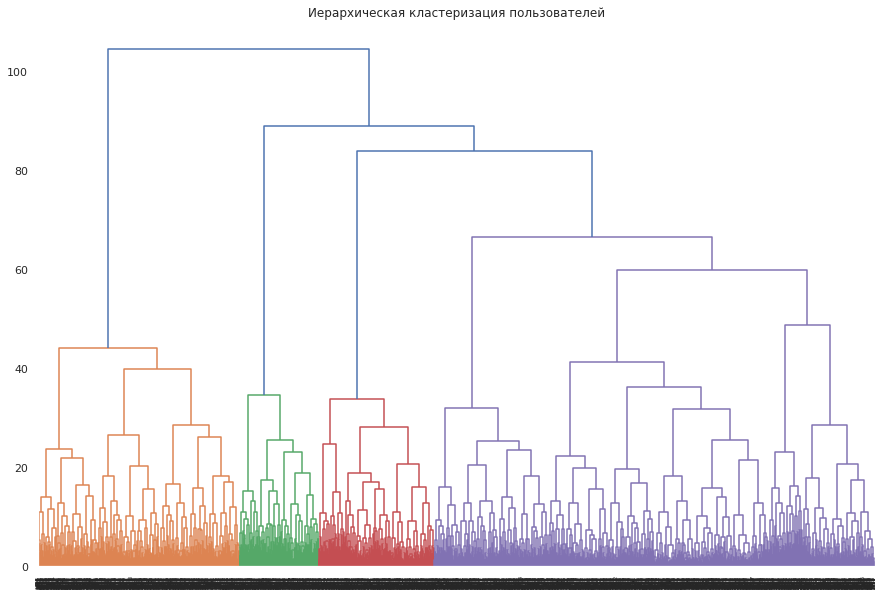

In [19]:
#NB!чтобы просмотреть дендрограму без скролла использую горячие клавиши Shift + O*

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей')

plt.show() 

**На основе полученной дендрограммы можно выделить 4 кластера пользователей** (по количеству цветов на графике)

Далее я буду обучать модель кластеризации на основании алгоритма K-Means и прогнозировать кластеры клиентов. 

**NB!** *По условиям самостоятельного проекта в дальнейших расчетах я принимаю за число кластеров n=5*

In [20]:
# задаю модель k_means с числом кластеров 5
km = KMeans(n_clusters=5, random_state=0)

# прогнозирую кластеры для наблюдений
labels = km.fit_predict(X_sc)

Рассчитываю и вывожу средние значения признаков для кластеров

In [21]:
# сохраняю метки кластера в поле первоначального датасета
data['customers_clusters'] = labels

# вывожу статистику по средним значениям признаков по кластеру
display(data.groupby('customers_clusters').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
customers_clusters,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

По средним значениям кластеров можно сказать, что

**КЛАСТЕР 0** собрал в себя клиентов с 
- большинство клиентов этого кластера живут на районе с фитнес-центром (0.95)
- самым высоким показателем применения скидки от работодателя (0.8) и промо-кода от друзей (0.6)
- у них самые длинные контракты (10.9) и самый длинный срок до окончания текущего абонемента (9.95)
- они больше всех ходят на групповые занятия (0.54)
- один из самых высоких средних возростов (29.98, уступают кластеру 4 всего на 0.2)
- они на втором месте (с большим отрывом) по тратам на дополнительные услуги (160.8, только в кластере 4 показатель выше на 0.9)
- они на втором месте по времени с момента первого обращения в фитнес-центр (4.7, уступают кластеру 4 всего на 0.2)
- частота посещения фитнес-центра за весь период и за последний месяц у них также одна из самых высокий (1.98 и 1.97, снова уступают только кластеру 4)
- *у них самый низкий средний показатель оттока среди всех кластеров (0.02)*

**КЛАСТЕР 1** собрал в себя "середнячков". В сравнении с остальными кластерами:
- у них средий уровень показателя показателя применения скидки от работодателя (0.5) и промо-кода от друзей (0.3)
- средняя продолжительность контракта и срок до окончания текущего абонемента (4.8 и 4.5)
- они средненько ходят на групповые занятия (0.43)
- средненько тратят на дополнительные услуги (143.9)
- их временя с момента первого обращения в фитнес-центр средненькое (3.92)
- частота посещения фитнес-центра за весь период и за последний месяц тоже средненькая (1.84 и 1.71)
- *средний показатель оттока ожидаемо тоже средненький по сравнению с другими кластерами (0.26)*

**КЛАСТЕР 2** собрал в себя клиентов с показателями ниже среднего, но не самыми "плохими" в сравнении с другими кластерами. Отличительной особенностью этого кластера является то, что все клиенты в нем живут *не в том же районе, где находится фитнес-клуб*. Также:
- у них средий уровень показателя показателя применения скидки от работодателя (0.5), но они практически не пользуются промо-кодами от друзей (0.07, "худший" показатель среди всех кластеров)
- продолжительность контракта и срок до окончания текущего абонемента ниже среднего, но не самый низкий среди всех кластеров (2.2 и 2.4)
- они меньше всех ходят на групповые занятия (0.22, "худший" показатель среди всех кластеров)
- показатели времени с момента первого обращения в фитнес-центр и чатоты посещений клуба за все время и за неделю тоже ниже средних по кластерам (2.8, 1.7, 1.5)
- *средний показатель оттока ожидаемо ниже среднего по сравнению с другими кластерами (0.44), но не самый плохой из всех*

**КЛАСТЕР 3** собрал в себя клиентов с самым высоким показателем оттока и самым "молодым" средним возрастом из всех кластеров:
- средний возраст в этом кластере чуть выше 28 лет (28.1)
- любопытно, что все клиенты живут на районе с фитнес-центом (1 !)
- но сравнительно мало пользуются реферальными программами (скидками от работодателя и промо-кодами от друзей) (0.4 и 0.2)
- продолжительность контракта и срок до окончания текущего абонемента самые низкие (1.9 и 1.9)
- они меньше всех тратят в среднем на дополнительные услуги (131.6)
- частота посещения фитнес-центра за весь период и за последний месяц в этом кластере тоже самые низкие (1.2 и 1)
- *как я уже сказала средний показатель оттока у этого кластера ожидаемо самый высокий по сравнению с другими (0.51)*

**КЛАСТЕР 4** один из самых интересных :)
- большинство клиентов этого кластера живут на районе с фитнес-центром (0.98, даже выше кластера 1)
- но, в отличие от кластера 1 они парктически не пользуются реферальными программами (0.4 и 0.2) и длительность абонементов у них сравнительно невысокая (2.7 и 2.6)
- средний возраст в кластере самый высокий из всех - 30.1 год
- по посещению групповых занятий они на втором месте после кластера 1 (0.47)
- они больше всех тратят на дополнительные услуги (161.7)
- также у них самая высокая частота посещения фитнес-центра за весь период и за последний месяц (2.9 и 2.9)
- *у этих клиентов один из самых низких средних показателей оттока среди всех кластеров (0.07) - второе место после кластера 1*

**Картина, которую мы видим по описаниям кластеров подтверждает мои гипотезы и выводы предыдущих пунктов. Можно говорить о том, что вырисовываются достаточно четкие портреты клиентов, склонных заниматься на протяжении долгого времени или же наоборот, уходить в отток.** 

Далее строю распределения признаков для кластеров

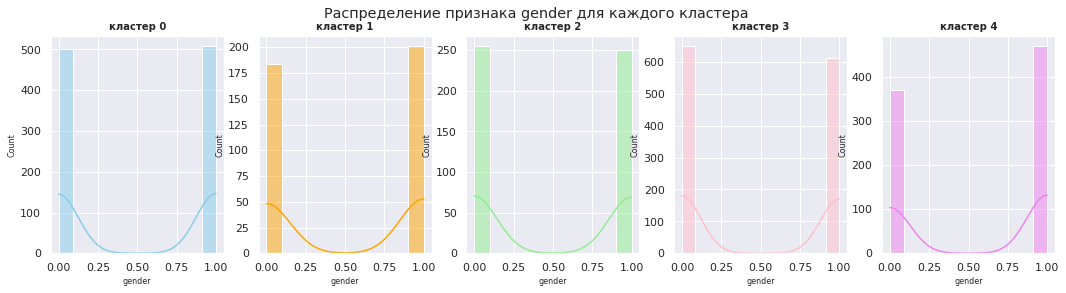

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


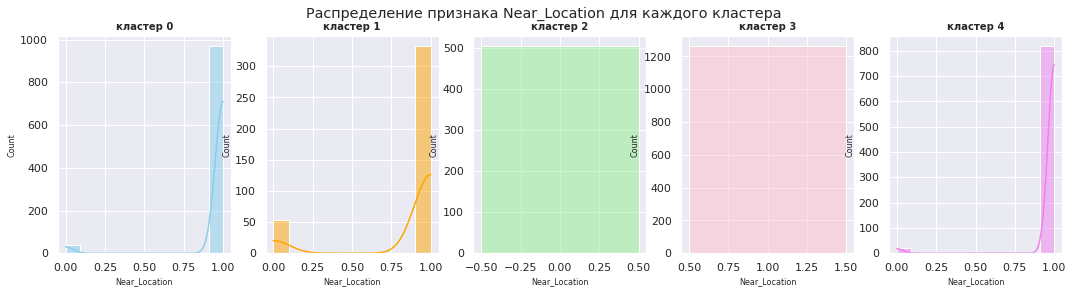

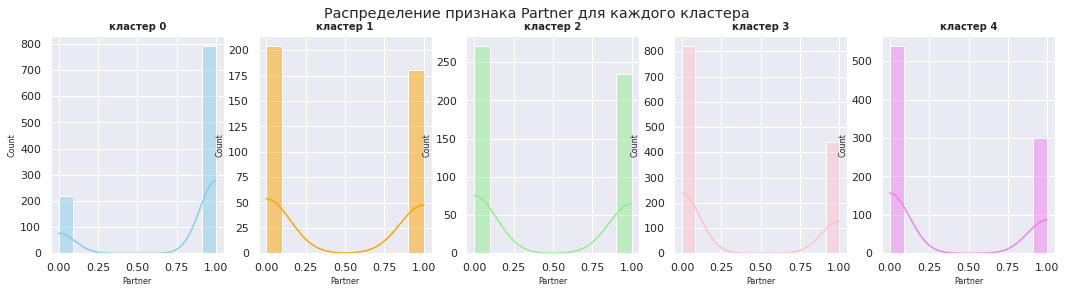

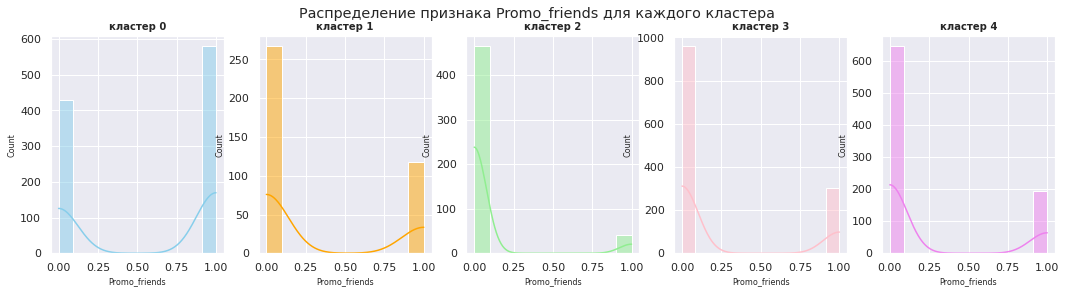

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


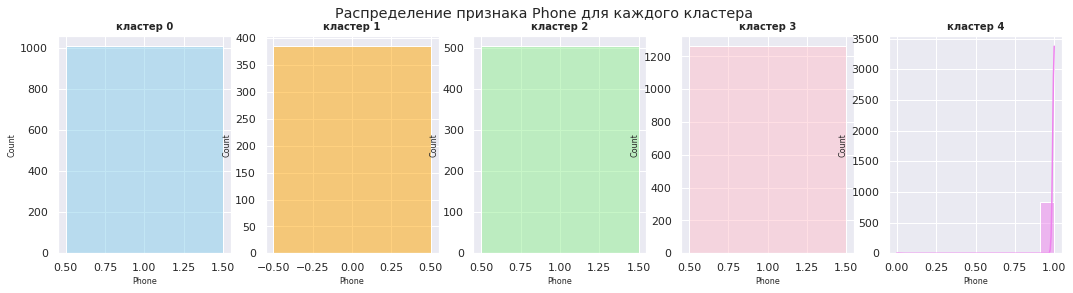

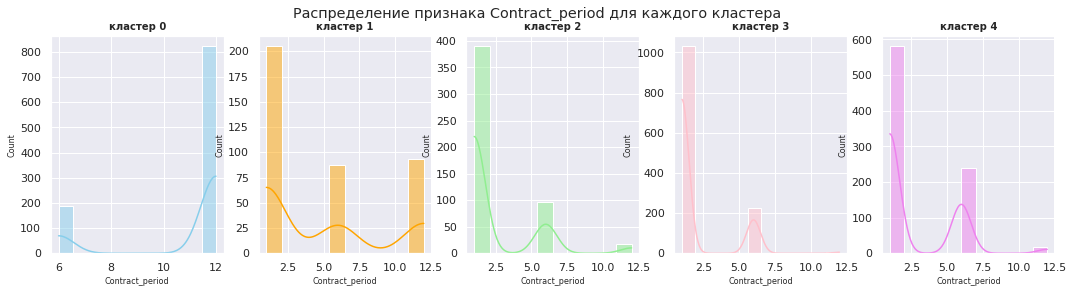

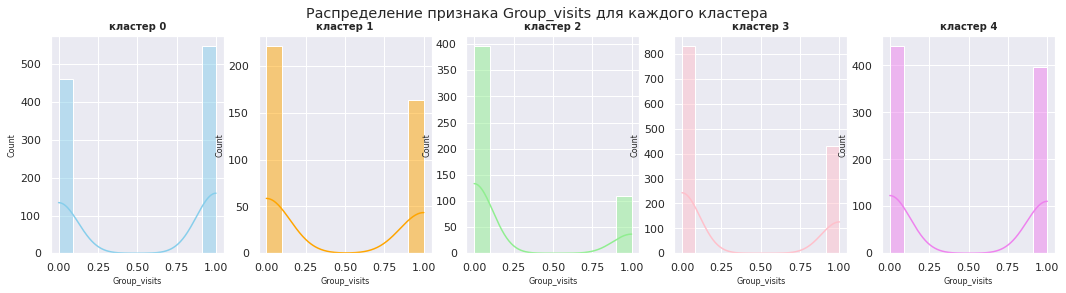

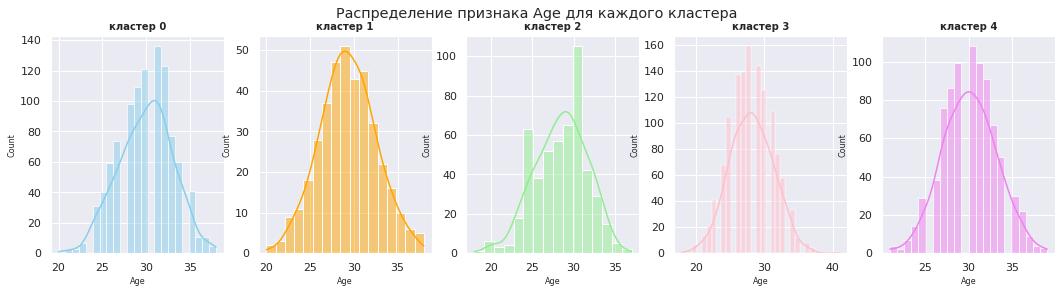

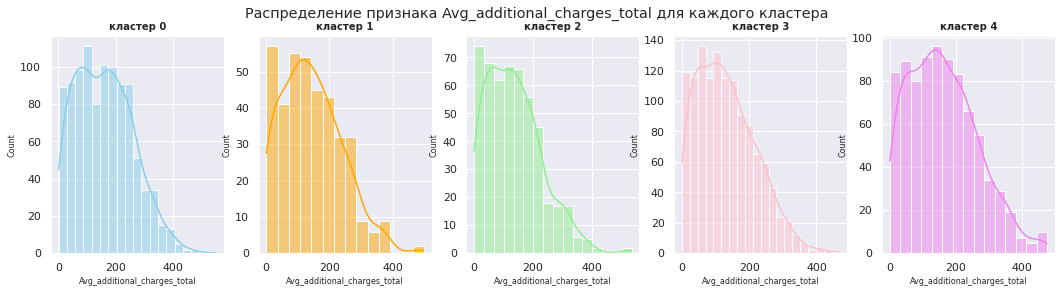

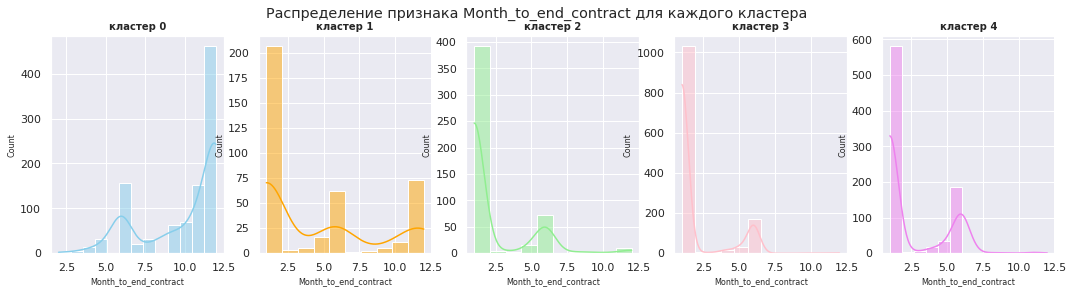

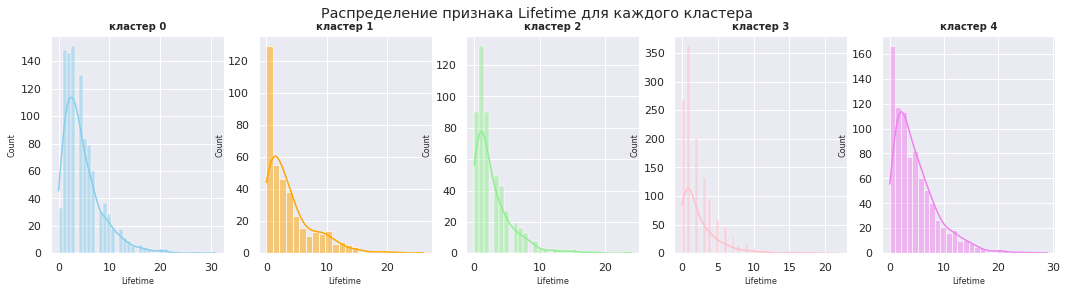

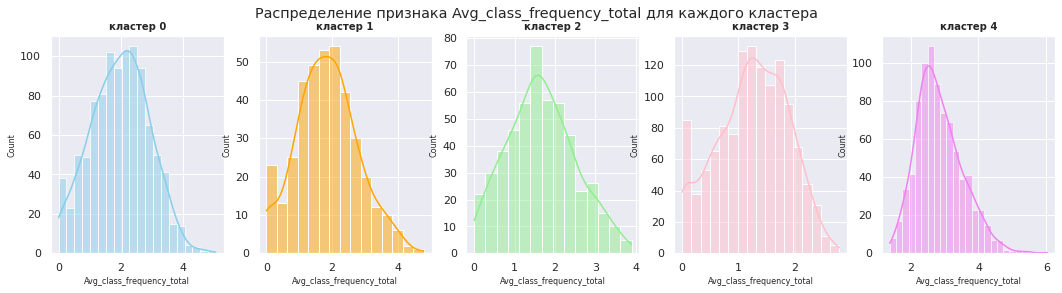

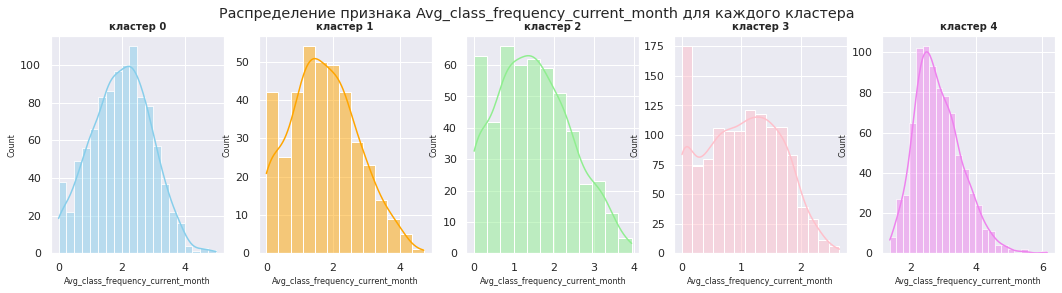

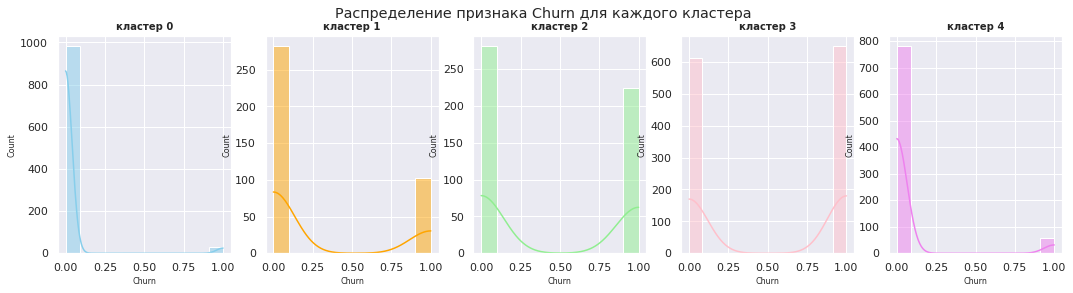

In [22]:
for feature in data.columns:
    if feature != 'customers_clusters':
        
        sns.set(style="darkgrid")
        fig, axs = plt.subplots(1, 5, figsize=(18, 4))
    
        sns.histplot(data=data.query('customers_clusters == 0'), x=feature, kde=True, color="skyblue", ax=axs[0])
        axs[0].set_title('кластер 0', fontsize=10, weight='bold', ha='center')
        axs[0].xaxis.label.set_size(8)
        axs[0].yaxis.label.set_size(8)
    
        sns.histplot(data=data.query('customers_clusters == 1'), x=feature, kde=True, color="orange", ax=axs[1])
        axs[1].set_title('кластер 1', fontsize=10, weight='bold', ha='center')
        axs[1].xaxis.label.set_size(8)
        axs[1].yaxis.label.set_size(8)
    
        sns.histplot(data=data.query('customers_clusters == 2'), x=feature, kde=True, color="lightgreen", ax=axs[2])
        axs[2].set_title('кластер 2', fontsize=10, weight='bold', ha='center')
        axs[2].xaxis.label.set_size(8)
        axs[2].yaxis.label.set_size(8)
    
        sns.histplot(data=data.query('customers_clusters == 3'), x=feature, kde=True, color="pink", ax=axs[3])
        axs[3].set_title('кластер 3', fontsize=10, weight='bold', ha='center')
        axs[3].xaxis.label.set_size(8)
        axs[3].yaxis.label.set_size(8)
    
        sns.histplot(data=data.query('customers_clusters == 4'), x=feature, kde=True, color="violet", ax=axs[4])
        axs[4].set_title('кластер 4', fontsize=10, weight='bold', ha='center')
        axs[4].xaxis.label.set_size(8)
        axs[4].yaxis.label.set_size(8)
    
        fig.suptitle(f'Распределение признака {feature} для каждого кластера')
        plt.show()

#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

Графики отлично иллюстрируют наблюдения, которые я сделала в предыдущем пункте. Отдельно остановлюсь на нескольких интересных моментах: 
>- **КЛАСТЕР 0** заметно отличается на графиках от всех остальных кластеров и в некоторых параметрах показывает противоположную всем остальным кластерам картину (использование обоих типов рефералок, длительность абонемента и время до его конца, групповые занятия
>- также на графиках особенно заметно насколько близки по поведенческим паттернам **КЛАСТЕРЫ 0 и 4**: графики непрерывных переменных (возраст и дополнительные траты) очень близки, и, конечно, график бинарного показателя оттока также очень близок
>- **КЛАСТЕР 3** как кластер с самым большим оттоком также заметно выделяется на графиках в сравнении со всеми остальными кластерами: частота посещения за все время и за месяц не доходит до 3, когда у остальных кластеров выше 4 (а у последнего кластера 6!). А во всех бинарных показателях превалирует значение 0.

Для каждого полученного кластера рассчитываю долю оттока

In [23]:
churn_share = data.groupby(['customers_clusters']).agg({'Lifetime': 'count', 'Churn': 'sum'})
churn_share['churn_share'] = churn_share['Churn'] / churn_share['Lifetime'] * 100
churn_share.columns = ['Общее кол-во пользователей', 'Кол-во ушедших пользователей', 'Доля оттока в %']
churn_share = churn_share.sort_values(by=['Доля оттока в %'], ascending=False)
churn_share

,Общее кол-во пользователей,Кол-во ушедших пользователей,Доля оттока в %
customers_clusters,,,
3,1262,649,51.426307
2,505,224,44.356436
1,385,103,26.753247
4,838,57,6.801909
0,1010,28,2.772277


#### ПРОМЕЖУТОЧНЫЕ НАБЛЮДЕНИЯ

Доля оттока подтверждает все наблюдения, которые я изложила выше:
- **Самые надежные кластеры** - №0 и №4
- **Самые НЕнадежные кластеры** - №2 и №3. При это кластер 3 САМЫЙ ненадежный со значительным отрывом от кластера 2

<a id="results"></a>
## ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО СТРАТЕГИИ УДЕРЖАНИЯ КЛИЕНТОВ

**КЛЮЧЕВЫЕ ВЫВОДЫ**

**Наиболее весомыми признаками, которые позволяют судить о том, продолжит ли клиент заниматься или бросит занятия являются:**
1. время с момента первого обращения в фитнес-центр
2. средняя частота посещений в неделю за предыдущий месяц
3. средняя частота посещений в неделю за все время с начала действия абонемента
4. возраст
5. выручка от дополнительных услуг фитнес-центра

Таким образом можно говорить о том, что если клиент ходит в клуб давно, достаточно часто на протяжении всего периода занятий и частота посещений не падает (или падает незначительно) в последний месяц наблюдения, то он мало вероятно собирается бросать занятия. 

При этом более старшая возрастная группа 29-35 лет менее склонна к оттоку. Можно предположить, что это клиенты, которые понимают зачем они ходят заниматься: например, у них уже заболела спина от сидячей работы за компьютером :) и их мотивация заниматься выше

Также важным индикатором серьезности его намерений заниматься дальше является то, сколько клиент тратит на дополнительные услуги фитнес-клуба. Можно предположить, что это люди, которые более осознанно занимаются спортом (потребляют спортивное питание, разгружают мышцы массажем и тд). Это люди, которые готовы инвестировать не только в сам спорт, но и в sporty lifestyle. 

Дополнительно анализ показал важность реферальных программ (самые надежные кластеры 0 и 4 показали использование на высоком уровне или уровне выше среднего).  

**РЕКОМЕНДАЦИИ ПО УДЕРЖАНИЮ КЛИЕНТОВ**

**ПРИНЦИП 1**

**Важно работать на повышение вовлеченности и лояльности клиентов, которые ходят в клуб.** 

Необходимо отдельно работать с поддержанием частоты посещений клуба, особенно у старых ("горячих") клиентов. В рамках маркетинговой стратегии можно реализовать "игровые механики" с получением физических или диджитальных ачивок за достижение определенных показателей (например, количесвто посещений зала за месяц, количество км на беговой дорожке, поднятие определенного веса и тд). Этот метод отлично показывает себя в групповых забега: медаль на финишной черте мотивирует многих выйти на трассу. В качестве референса можно обратить внимание вот на этот проект, реализованный в digital - https://www.theconqueror.events  

**ПРИНЦИП 2**

**В коммуникации делать фокус на более старшей возрастной группе 29-35+**

Более молодой сегмент может легче конвертироваться в силу влияния инфлюенсеров и моды, но более "возрастной" сегмент имеет гораздо более высокую мотивацию и понимает зачем ходит в зал. В разработке креативной рамки можно работать с инсайтом о том, что занятия спортом, это то, что не про похудение, а про здоровье и инвестицию в активную и долгую жизнь.

**ПРИНЦИП 3**

**Уделить больше внимания продаже дополнительных услуг**

Чем больше клиент тратит на доп услуги, тем менее вероятно, что он уйдет в отток. Не только потому что уже потратил много денег :) а потому что он вовлекается в "полный цикл" healthy лайфстайла. Дополнительные услуги стоит "продавать" в рамках инсайта из предыдущего пункта, как полноценные части комплекса/пути спортивного образа жизни, которые приблизят клиента к здоровому телу и долгой и счастливой жизни

**ПРИНЦИП 4**

**Усилить работу с b2b сегментом**

Скидки от работодателя показывают себя эффективно. Можно проработать коммуникацию с текущими партнерами, разработать с совместно с ними дополнительную стимуляцию их сотрудников, возможно предложить дополнительные "подарки" (первый сеанс массажа бесплатно). Также стоит подумать в сторону расширения базы партнеров. Увеличивать скидки не стоит. 